In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

In [11]:
cells = 10000
tmg_concentration = 40
file_on = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_on_tmg_{tmg_concentration}_cells_{cells}.csv'
file_off = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_off_tmg_{tmg_concentration}_cells_{cells}.csv'

data_on = pd.read_csv(file_on, delimiter='|')
data_off = pd.read_csv(file_off, delimiter='|')

In [16]:
k_off = 1/np.mean(data_off.On_Time)
k_on = 1/np.mean(data_on.Off_Time)
x = np.linspace(0,60000,100)

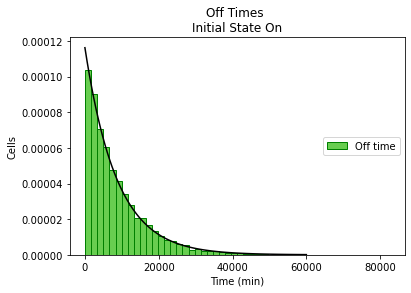

In [17]:
plt.plot(x,k_on*np.exp(-k_on*x), color='k')
plt.hist(data_on.Off_Time,bins=50,color='#68ce50',label='Off time',density=True, edgecolor='g');
plt.title(f'Off Times \nInitial State On')
plt.xlabel('Time (min)')
plt.ylabel('Cells')
plt.legend(loc=7)

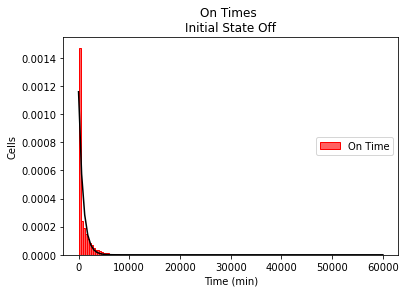

In [18]:
plt.plot(x,k_off*np.exp(-k_off*x), color='k')
plt.hist(data_off.On_Time, bins=50,color='#ff6060',label='On Time', density=True, edgecolor='r');
plt.title(f'On Times \nInitial State Off')
plt.xlabel('Time (min)')
plt.ylabel('Cells')
plt.legend(loc=7)

In [26]:

mean_arr_on = []
mean_arr_off = []

cv_2arr_on = []
cv_2arr_off = []

tmg_arr = [i*5 for i in range(1,9)]

for tmg_concentration in range(1,9):
    cells = 10000
    file_on = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_on_tmg_{tmg_concentration*5}_cells_{cells}.csv'
    file_off = f'../simulation_data/gillespie_on_off/gillespie_on_off_state_off_tmg_{tmg_concentration*5}_cells_{cells}.csv'
    data_on = pd.read_csv(file_on, delimiter='|')
    data_off = pd.read_csv(file_off, delimiter='|')

    mean_on = np.mean(data_on.Off_Time) * 0.0231
    cv2_on = np.var(data_on.Off_Time)/np.mean(data_on.Off_Time)**2
    
    mean_arr_on.append(mean_on) 
    cv_2arr_on.append(cv2_on)

    mean_off =  np.mean(data_off.On_Time) * 0.0231
    cv2_off = np.var(data_off.On_Time)/np.mean(data_off.On_Time)**2
    mean_arr_off.append(mean_off) 
    cv_2arr_off.append(cv2_off)

(0.0, 478.5264187121636)

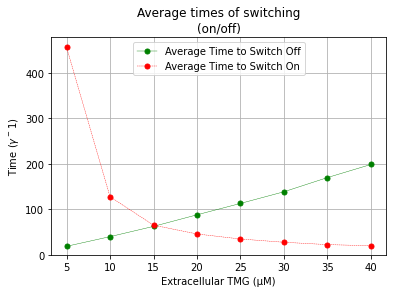

In [42]:
plt.plot(tmg_arr,mean_arr_on, 'g-o', label='Average Time to Switch Off', ms= 5, lw=0.4)
plt.plot(tmg_arr, mean_arr_off, 'r--o', label='Average Time to Switch On', ms = 5,lw=0.4)
plt.title('Average times of switching\n(on/off)')
plt.xlabel('Extracellular TMG (µM)')
plt.ylabel('Time ($γ^-1$)')
plt.legend(loc=9)
plt.grid()
plt.ylim(0)

(0.0, 2.5994704098707855)

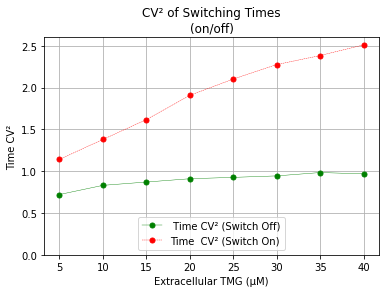

In [43]:
plt.plot(tmg_arr,cv_2arr_on, 'g-o', label=' Time CV² (Switch Off)', ms= 5,lw=0.4)
plt.plot(tmg_arr, cv_2arr_off, 'r--o', label='Time  CV² (Switch On)', ms = 5,lw=0.4)
plt.title('CV² of Switching Times\n(on/off)')
plt.xlabel('Extracellular TMG (µM)')
plt.ylabel('Time CV²')
plt.legend(loc=8)
plt.grid()
plt.ylim(0)